In [10]:
import pandas as pd
import numpy as np

from metrics import print_metrics

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import StandardScaler

random_seed = 42

In [2]:
train = pd.read_csv("../data/featured/train.csv", sep=',')
val = pd.read_csv("../data/featured/val.csv", sep=',')

train['date'] = pd.to_datetime(train['date'])

Xtrain = train.drop(columns=['teamA_win'])
ytrain = train['teamA_win']

Xval = val.drop(columns=['teamA_win'])
yval = val['teamA_win']

display(Xtrain.shape, Xval.shape)

(4830, 55)

(209, 55)

In [3]:
min_date = Xtrain['date'].min()
max_date = Xtrain['date'].max()
sample_weight = (Xtrain['date'] - min_date) / (max_date - min_date)

Xtrain = Xtrain.drop(columns=['date'])
Xval = Xval.drop(columns=['date'])

In [19]:
scaler = StandardScaler()
Xtrain_S = scaler.fit_transform(Xtrain)
Xval_S = scaler.transform(Xval)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear','newton-cg'],
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = LogisticRegression(random_state=random_seed, **params)
    clf.fit(Xtrain_S, ytrain, sample_weight=sample_weight)
    
    yval_pred = clf.predict(Xval_S)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best Validation Accuracy: 0.7081339712918661


Accuracy: 0.7081339712918661
Confusion Matrix:
[[78 23]
 [38 70]]
F1 Score: 0.6965174129353234
Best Threshold (Youden's J statistic): 0.4513727543297838


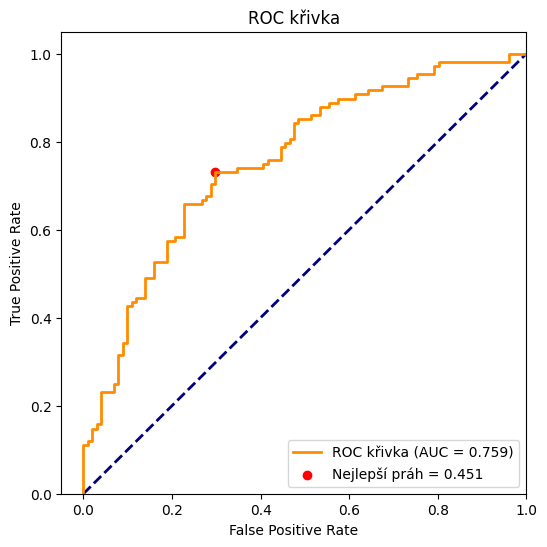

In [20]:
model = LogisticRegression(random_state=random_seed, **best_params)
model.fit(Xtrain_S, ytrain, sample_weight=sample_weight)

yval_pred = model.predict(Xval_S)
yval_proba = model.predict_proba(Xval_S)[:, 1]

print_metrics(yval, yval_pred, yval_proba)